In [1]:
import math
import numpy as np
#import h5py
import matplotlib.pyplot as plt
#from matplotlib.pyplot import imread
#import scipy
#from PIL import Image
#i#ort pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
#from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [2]:
w=[[[[-2.87726074e-01, -2.13144615e-01],
          [-1.70967817e-01,  7.77902901e-02],
          [-1.10756032e-01,  4.43092525e-01]],
 
         [[-1.01280892e-02, -2.67773181e-01],
          [ 8.70948359e-02, -1.34741738e-01],
          [ 3.32998447e-02,  1.81258425e-01]],
 
         [[-2.92300284e-01,  4.39086854e-02],
          [ 1.14349812e-01, -3.83515432e-02],
          [ 1.80642344e-02,  6.12849519e-02]],
 
         [[ 1.29207179e-01,  8.04681256e-02],
          [-2.33245082e-04,  1.91771209e-01],
          [-1.43450290e-01,  1.24637127e-01]],
 
         [[-2.71550417e-01, -2.35374682e-02],
          [-8.56711864e-02, -1.48314282e-01],
          [-2.40141302e-01, -2.49819845e-01]]],
 
 
        [[[ 1.38185605e-01, -2.00603366e-01],
          [ 2.02244163e-01, -1.77183002e-01],
          [-4.77392785e-02,  1.58466488e-01]],
 
         [[-7.22985268e-02, -5.86452931e-02],
          [ 2.00523362e-01,  9.61338431e-02],
          [-2.11441189e-01,  1.70188665e-01]],
 
         [[ 1.46813512e-01, -5.20003699e-02],
          [ 3.63386311e-02,  7.69097060e-02],
          [ 1.00694805e-01, -1.36276364e-01]],
 
         [[-6.28469214e-02,  3.13595057e-01],
          [ 2.19128683e-01,  1.50380135e-02],
          [-3.29140961e-01, -3.39972936e-02]],
 
         [[ 7.30818287e-02,  1.03169955e-01],
          [ 7.83474818e-02,  1.91423818e-01],
          [-1.49635404e-01, -2.43927389e-01]]],
 
 
        [[[-4.95439060e-02, -3.32588166e-01],
          [-7.98598900e-02, -2.58716822e-01],
          [-4.35757041e-01,  3.36973250e-01]],
 
         [[ 9.01433919e-03,  8.01802427e-02],
          [ 1.13111846e-01, -1.80162601e-02],
          [-6.74807504e-02,  1.32493213e-01]],
 
         [[ 9.24876779e-02, -9.43584666e-02],
          [ 7.01090693e-02, -1.81494102e-01],
          [ 3.08505213e-03, -1.88198224e-01]],
 
         [[-3.55880708e-02, -1.17006890e-01],
          [-1.46335781e-01, -3.22040051e-01],
          [-1.80616289e-01,  1.11090288e-01]],
 
         [[-5.99052235e-02,  2.47072786e-01],
          [ 2.45217815e-01,  1.18741188e-02],
          [-2.26027109e-02, -1.13854930e-02]]],
 
 
        [[[-5.53958938e-02, -3.28395724e-01],
          [ 2.36359850e-01, -2.62579978e-01],
          [-2.65422106e-01,  5.00602603e-01]],
 
         [[ 1.75131410e-02, -4.11213160e-01],
          [ 1.26186579e-01, -2.09061816e-01],
          [ 1.64233491e-01,  9.38537493e-02]],
 
         [[-1.84637159e-01, -6.06457889e-02],
          [ 2.95527548e-01, -4.03569907e-01],
          [ 3.44451936e-03,  1.52667969e-01]],
 
         [[-7.40479603e-02, -1.48156554e-01],
          [ 2.12050587e-01, -1.36618391e-01],
          [-4.44800258e-02,  5.22313714e-02]],
 
         [[-4.61285859e-02, -3.13889682e-01],
          [-2.05800116e-01, -3.70985925e-01],
          [-2.03848645e-01,  1.92488581e-01]]],
 
 
        [[[ 1.46156684e-01, -1.70358688e-01],
          [ 3.32475096e-01,  2.97371030e-01],
          [-3.96278441e-01,  7.56586611e-01]],
 
         [[-3.34352292e-02, -7.25021288e-02],
          [ 1.21698171e-01,  8.29709768e-02],
          [-1.99762672e-01,  7.00033307e-01]],
 
         [[-9.49652791e-02, -8.26335177e-02],
          [-1.68371737e-01,  1.11266211e-01],
          [-1.85594395e-01,  5.12987614e-01]],
 
         [[ 1.36395827e-01, -1.77388340e-01],
          [ 1.79758698e-01,  1.28983170e-01],
          [-1.44127402e-02,  4.18713033e-01]],
 
         [[ 9.64304358e-02, -2.86781341e-01],
          [ 1.99489206e-01, -1.34659493e-02],
          [-2.50617951e-01,  6.50567234e-01]]]]

In [3]:
w_array=np.array(w)
w_pesos = w_array.reshape(5, 5, 3, 2)
w_pesos = np.clip(w_pesos, -1,1)


In [4]:
dato_peso = w_pesos[0,2,0,1] #fila 0 columna 2, primer color, segundo filtro
dato_peso

0.0439086854

In [5]:
dato_peso = w_pesos[1,3,2,0] #fila 1 columna 3, tercer color, primer filtro
dato_peso
#orden: fila 0 columna 0 los tres colores, lueog se suma una a la columna, los tres colores asi hasta lelgar a 4 columnas donde se
#aumenta uno a la fila, esto a la izq, a la dcha lo mismo pero con el segundo filtro

-0.329140961

In [6]:
forma_w = w_pesos.shape

print(forma_w )

(5, 5, 3, 2)


In [7]:
b_pesos = np.array([1.040436  , 0.60879153])
b_pesos=np.clip(b_pesos,-1,1)
b_pesos

array([1.        , 0.60879153])

In [8]:
forma_b = b_pesos.shape

print(forma_b)

(2,)


In [9]:
#COJO DE EJEMPLO PARA LA ENTRADA UNA FOTO DE RANA Y OTRA DE AVION PARA VER LOS VALORES DEL POOL
cifar10 = tf.keras.datasets.cifar10
(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = cifar10.load_data()

In [10]:
# Definir las clases que nos interesan (gato y perro) PARA HACERLO SOLO CON SIGMOID
avion_class_ver = 0  #AVION
rana_class_ver = 6  # RANA

# Filtrar las imágenes y etiquetas para quedarnos solo con los gatos y perros
avion_indices = (Y_train_orig == avion_class_ver).squeeze()
rana_indices = (Y_train_orig == rana_class_ver).squeeze()
avion_rana_indices = avion_indices | rana_indices

X_train_avion_rana_ver = X_train_orig[avion_rana_indices]
Y_train_avion_rana_ver = Y_train_orig[avion_rana_indices]
# Definir las clases que nos interesan (aviom y rana) PARA HACERLO SOLO CON SIGMOID
avion_class = 0  #AVION
rana_class = 6  # RANA

# Filtrar las imágenes y etiquetas para quedarnos solo con los gatos y perros
avion_indices = (Y_test_orig == avion_class).squeeze()
rana_indices = (Y_test_orig == rana_class).squeeze()
avion_rana_indices = avion_indices | rana_indices

X_test_avion_rana_ver = X_test_orig[avion_rana_indices]
Y_test_avion_rana_ver = Y_test_orig[avion_rana_indices]

Y_train_avion_rana_ver= np.where(Y_train_avion_rana_ver == rana_class, 0, 1) # 1 avion 0 rana
Y_test_avion_rana_ver = np.where(Y_test_avion_rana_ver == rana_class, 0, 1)


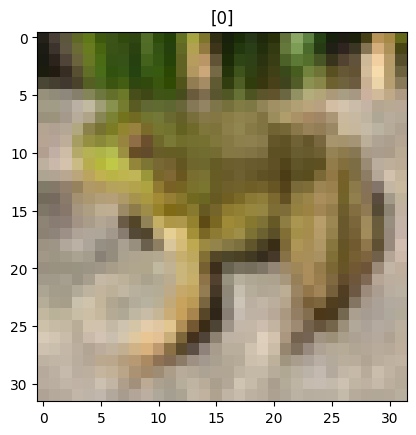

In [11]:
index_rana_ver = 280
Entrada_rana_ver=X_test_avion_rana_ver[index_rana_ver]
plt.title(Y_test_avion_rana_ver[index_rana_ver])
plt.imshow(Entrada_rana_ver) #display sample training image
plt.show()

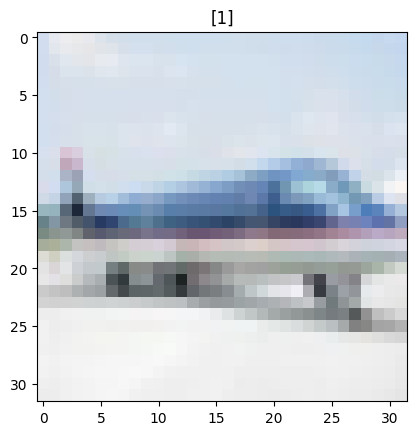

In [12]:
#FOTO RANA INDEX 124
index_avion_ver = 115
Entrada_avion_ver=X_test_avion_rana_ver[index_avion_ver]
plt.title(Y_test_avion_rana_ver[index_avion_ver])
plt.imshow(Entrada_avion_ver) #display sample training image
plt.show()

In [13]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig
Y_test = Y_test_orig

In [ ]:
#NORMALIZAMOS ENTRE -1 Y1 COMO HEMOS ENTRENADO
X_train = (X_train*2)-1
X_test =(X_test*2)-1

In [ ]:
# Definir las clases que nos interesan (gato y perro) PARA HACERLO SOLO CON SIGMOID
avion_class = 0  #AVION
rana_class = 6  # RANA

# Filtrar las imágenes y etiquetas para quedarnos solo con los gatos y perros
avion_indices = (Y_train == avion_class).squeeze()
rana_indices = (Y_train == rana_class).squeeze()
avion_rana_indices = avion_indices | rana_indices

X_train_avion_rana = X_train[avion_rana_indices]
Y_train_avion_rana = Y_train[avion_rana_indices]

# Verificar las dimensiones del nuevo conjunto de datos
print("Dimensiones de X_train_cat_dog:", X_train_avion_rana.shape)
print("Dimensiones de Y_train_cat_dog:", Y_train_avion_rana.shape)


In [ ]:
# Definir las clases que nos interesan (aviom y rana) PARA HACERLO SOLO CON SIGMOID
avion_class = 0  #AVION
rana_class = 6  # RANA

# Filtrar las imágenes y etiquetas para quedarnos solo con los gatos y perros
avion_indices = (Y_test == avion_class).squeeze()
rana_indices = (Y_test == rana_class).squeeze()
avion_rana_indices = avion_indices | rana_indices

X_test_avion_rana = X_test[avion_rana_indices]
Y_test_avion_rana = Y_test[avion_rana_indices]

# Verificar las dimensiones del nuevo conjunto de datos
print("Dimensiones de X_train_cat_dog:", X_test_avion_rana.shape)
print("Dimensiones de Y_train_cat_dog:", Y_test_avion_rana.shape)

In [ ]:
Y_train_avion_rana= np.where(Y_train_avion_rana == rana_class, 0, 1) # 1 avion 0 rana
Y_test_avion_rana = np.where(Y_test_avion_rana == rana_class, 0, 1)

In [ ]:
#FOTO RANA INDEX 124
index_rana = 426
Entrada_rana=X_test_avion_rana[index_rana]
plt.title(Y_test_avion_rana[index_rana])
plt.imshow(Entrada_rana) #display sample training image
plt.show()

In [ ]:
#FOTO RANA INDEX 124
index_avion = 1250
Entrada_avion=X_test_avion_rana[index_avion]
plt.title(Y_test_avion_rana[index_avion])
plt.imshow(Entrada_avion) #display sample training image
plt.show()

In [ ]:
#Entrada_rana

In [ ]:
entrada_array =np.array(Entrada_rana)
entrada_rana= entrada_array.reshape(32, 32, 3)
#entrada_rana

In [ ]:
np.set_printoptions(threshold=np.inf)

# Ahora imprime la matriz
#print(entrada_rana)

In [ ]:
dato = entrada_rana[0, 0, 2] #en el print va fila 0, columna 0 y los tres colores
print(dato)

In [ ]:
dato = entrada_rana[0, 1, 0] #en el print va fila 0, columna 1 y el primer
print(dato)

In [ ]:
dato = entrada_rana[0, 31, 0] #en el print va fila 0, columna 1 y el primer
print(dato)

In [ ]:
dato = entrada_rana[1, 0, 0] #en el print va fila 0, columna 1 y el primer
print(dato)
# imprime los tres colores (3 en horizontal) luego va hace fila 0 de columna 0 a 31 y luego fila 

In [ ]:
entrada_rana = np.expand_dims(entrada_rana, axis=0)
forma_entrada_rana = entrada_rana.shape

print(forma_entrada_rana)

In [ ]:

entrada_tf_rana = tf.constant(entrada_rana, dtype=tf.float32)
pesos_filtro_tf = tf.constant(w_pesos, dtype=tf.float32)
sesgos_tf = tf.constant(b_pesos, dtype=tf.float32)

# Realizar la convolución
resultado_convolucion = tf.nn.conv2d(entrada_tf_rana, pesos_filtro_tf, strides=[1, 9, 9, 1], padding='VALID')

# Agregar los sesgos
resultado_convolucion_y_sesgos_rana = tf.nn.bias_add(resultado_convolucion, sesgos_tf)


In [ ]:
resultado_convolucion_y_sesgos_rana

In [ ]:
resultado_filtro_norm_rana = resultado_convolucion_y_sesgos_rana/4
resultado_filtro_norm_rana

In [ ]:
estocast_rana = np.round((255*resultado_filtro_norm_rana +255)/2)
estocast_rana

In [ ]:
resultado_relu_norm_rana = tf.nn.relu(resultado_filtro_norm_rana)

# Aplicar una capa de pooling 2x2
resultado_pooling_norm_rana = tf.nn.max_pool(resultado_relu_norm_rana, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# Imprimir la forma del resultado de

In [ ]:
resultado_pooling_norm_rana = np.clip (resultado_pooling_norm_rana,-1,1)
resultado_pooling_norm_rana

In [ ]:
dimensiones = resultado_pooling_norm_rana.shape
print(dimensiones) 

In [ ]:
pool0_0_0= resultado_pooling_norm_rana[0,0,0,0]
pool0_1_0= resultado_pooling_norm_rana[0,0,1,0]
pool1_0_0= resultado_pooling_norm_rana[0,1,0,0]
pool1_1_0= resultado_pooling_norm_rana[0,1,1,0]
pool0_0_1= resultado_pooling_norm_rana[0,0,0,1]
pool0_1_1= resultado_pooling_norm_rana[0,0,1,1]
pool1_0_1= resultado_pooling_norm_rana[0,1,0,1]
pool1_1_1= resultado_pooling_norm_rana[0,1,1,1]
print(pool0_0_0)
print(pool0_1_0)
print(pool1_0_0)
print(pool1_1_0)
print(pool0_0_1)
print(pool0_1_1)
print(pool1_0_1)
print(pool1_1_1)

In [ ]:
w_fullyc_orig=[[-0.86564887],
        [ 0.74361247],
        [-0.86361414],
        [ 1.0822501 ],
        [ 0.29756275],
        [-0.53874725],
        [ 0.22574893],
        [ 0.2403658 ]]
w_fullyc_array=np.array(w_fullyc_orig)
w_fullyc_reshaped = w_fullyc_array.reshape(8,1)
w_fullyc=np.clip(w_fullyc_reshaped,-1,1)
w_fullyc

In [ ]:
resultado_pooling_norm_rana

In [ ]:
b_fullyc_orig = np.array([0.3093216])
b_fullyc =b_fullyc_orig
b_fullyc

In [ ]:
# Aplana la salida
flattened_output_norm_rana = tfl.Flatten()(resultado_pooling_norm_rana)

# Calcular la capa densa manualmente
dense_weights_rana =w_fullyc # Inserta tus pesos aquí (debe tener la forma (flattened_output.shape[1], 8))
dense_bias_rana = b_fullyc     # Inserta tu sesgo aquí (debe tener la forma (8,))
z_norm_rana_pesos = tf.matmul(flattened_output_norm_rana, dense_weights_rana) 

#CUENTAS PAPEL POR EL BIAS Y PESOS FC
z_norm_rana=z_norm_rana_pesos*4
z_norm_rana=z_norm_rana + dense_bias_rana
#NO DIVIDIMOS LOS PESOS AHORA z2_norm_rana=z_norm_rana*2
z2_norm_rana=z_norm_rana
sigmoid_output_rana = tf.nn.sigmoid(z2_norm_rana)


In [ ]:
z_norm_rana_pesos

In [ ]:
flattened_output_norm_rana

In [ ]:
z_norm_rana

In [ ]:
dimensiones = flattened_output_norm_rana.shape
print(dimensiones) 

In [ ]:
flatten0= flattened_output_norm_rana[0,0]
flatten1= flattened_output_norm_rana[0,1]
flatten2= flattened_output_norm_rana[0,2]
print(flatten0)
print(flatten1)
print(flatten2)

In [ ]:
z2_norm_rana

In [ ]:
sigmoid_output_rana

In [ ]:
binary_output_rana = tf.where(sigmoid_output_rana < 0.5, 0, 1)
# PREDICE BIEN QUE ES UNA RANA
binary_output_rana

In [ ]:
# AHORA COMPRUEBO QUE DARÍA LO MISMO SINO NORMALIZO NI LOS PESOS NI EL POOL2
    # AHORA LO MISMO PERO SIN DIVIDIR LOS PESOS NI EL POOL PARA VER QUE DA LO MISMO
w_pesos_sin_norm = w_pesos # no los habia divido
b_pesos_sin_norm = b_pesos
#w_fullyc_sin_norm = w_fullyc*2 # los habia divido por 2
#b_fullyc_sin_norm = b_fullyc*2
w_fullyc_sin_norm =w_fullyc
b_fullyc_sin_norm = b_fullyc

In [ ]:
entrada_tf_sin_norm_rana = tf.constant(entrada_rana, dtype=tf.float32)# MISMA ENTRADA ESPERAMOS MISMA SALIDA
pesos_filtro_tf_sin_norm_rana = tf.constant(w_pesos_sin_norm, dtype=tf.float32)
sesgos_tf_sin_norm_rana = tf.constant(b_pesos_sin_norm, dtype=tf.float32)

# Realizar la convolución
resultado_convolucion_sin_norm_rana = tf.nn.conv2d(entrada_tf_sin_norm_rana, pesos_filtro_tf_sin_norm_rana, strides=[1, 9, 9, 1], padding='VALID') 
# Agregar los sesgos
resultado_convolucion_y_sesgos_sin_norm_rana = tf.nn.bias_add(resultado_convolucion_sin_norm_rana, sesgos_tf_sin_norm_rana)

# NO DIVIDIMOS
resultado_filtro_sin_norm_rana = resultado_convolucion_y_sesgos_sin_norm_rana

resultado_relu_sin_norm_rana = tf.nn.relu(resultado_filtro_sin_norm_rana)

# Aplicar una capa de pooling 2x2
resultado_pooling_sin_norm_rana = tf.nn.max_pool(resultado_relu_sin_norm_rana, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# Imprimir la forma del resultado después de la capa de pooling
print(resultado_pooling_sin_norm_rana.shape)

In [ ]:
resultado_pooling_sin_norm_rana

In [ ]:
# Aplana la salida
flattened_output_sin_norm_rana = tfl.Flatten()(resultado_pooling_sin_norm_rana)

# Calcular la capa densa manualmente
dense_weights_sin_norm_rana =w_fullyc_sin_norm # Inserta tus pesos aquí (debe tener la forma (flattened_output.shape[1], 8))
dense_bias_sin_norm_rana = b_fullyc_sin_norm     # Inserta tu sesgo aquí (debe tener la forma (8,))
z_norm_sin_norm_rana = tf.matmul(flattened_output_sin_norm_rana, dense_weights_sin_norm_rana) + dense_bias_sin_norm_rana

# Aplicar la activación sigmoide (si es necesario)
sigmoid_output_sin_norm_rana = tf.nn.sigmoid(z_norm_sin_norm_rana)

In [ ]:
z_norm_sin_norm_rana#numpy=array([[-3.27411]] da igual que normalizando, correcto

In [ ]:
#AHORA REALIZO LO MISMO CON LA FOTO DEL AVION, PARA VER SI NORMALIZANDO EL POOL POR 2 ES SUFICIENTE PARA QUE ESTE ENTRE -1 Y 1
entrada_array =np.array(Entrada_avion)
entrada_avion= entrada_array.reshape(32, 32, 3)
#entrada_avion

In [ ]:
np.set_printoptions(threshold=np.inf)

# Ahora imprime la matriz
#print(entrada_avion)

In [ ]:
entrada_avion = np.expand_dims(entrada_avion, axis=0)
forma_entrada_avion = entrada_avion.shape

print(forma_entrada_avion)

In [ ]:
entrada_tf_avion = tf.constant(entrada_avion, dtype=tf.float32)
pesos_filtro_tf = tf.constant(w_pesos, dtype=tf.float32)
sesgos_tf = tf.constant(b_pesos, dtype=tf.float32)

# Realizar la convolución
resultado_convolucion_avion = tf.nn.conv2d(entrada_tf_avion, pesos_filtro_tf, strides=[1, 9, 9, 1], padding='VALID') 
# Agregar los sesgos
resultado_convolucion_y_sesgos_avion = tf.nn.bias_add(resultado_convolucion_avion, sesgos_tf)
resultado_convolucion_y_sesgos_avion

In [ ]:
resultado_filtro_norm_avion = resultado_convolucion_y_sesgos_avion/4
resultado_filtro_norm_avion= np.clip(resultado_filtro_norm_avion,-1,1)
resultado_filtro_norm_avion

In [ ]:
resultado_relu_norm_avion = tf.nn.relu(resultado_filtro_norm_avion)

# Aplicar una capa de pooling 2x2
resultado_pooling_norm_avion = tf.nn.max_pool(resultado_relu_norm_avion, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# Imprimir la forma del resultado después de la capa de pooling
print(resultado_pooling_norm_avion.shape)

In [ ]:
resultado_pooling_norm_avion

In [ ]:
# Aplana la salida
flattened_output_norm_avion= tfl.Flatten()(resultado_pooling_norm_avion)

# Calcular la capa densa manualmente
dense_weights_avion =w_fullyc # Inserta tus pesos aquí (debe tener la forma (flattened_output.shape[1], 8))
dense_bias_avion = b_fullyc     # Inserta tu sesgo aquí (debe tener la forma (8,))
z_norm_avion_res_capa = tf.matmul(flattened_output_norm_avion, dense_weights_avion) 
z_norm_avion_res_capa = np.clip (z_norm_avion_res_capa,-1,1)
#CUENTAS PAPEL POR EL BIAS Y PESOS FC
z_norm_avion=z_norm_avion_res_capa*4
z_norm_avion_suma_bias=z_norm_avion + dense_bias_avion
z2_norm_avion=z_norm_avion_suma_bias
# Aplicar la activación sigmoide (si es necesario)
sigmoid_output_avion_norm = tf.nn.sigmoid(z2_norm_avion)


In [ ]:
z_norm_avion_res_capa

In [ ]:
z_norm_avion_suma_bias  #en verdad con que sea mayor que cero va a ser avion

In [ ]:
z2_norm_avion

In [ ]:
sigmoid_output_avion_norm

In [ ]:
binary_output_avion = tf.where(sigmoid_output_avion_norm < 0.5, 0, 1)
binary_output_avion
# LO RECONOCE BIEN, TIENE MUCHO MARGEN, AUNQUE SE A RECORTADO UN POCO EN POOL (MAX ERA 2.56 , DIVIDIDO 1.28 SE HA RECORTADO A 1 
# PERO VEMOS QUE NO LO AFECTA CASI ES 1 ANTES D ELA COMPARCION)

In [ ]:
#POR ULTIMO HACEMOS LA COMPARACION DE NO HACER NORMALIZACION DE PESOS, DE POOL NI POR TANTO DEL CLIP
entrada_tf_sin_norm_avion = tf.constant(entrada_avion, dtype=tf.float32)# MISMA ENTRADA ESPERAMOS MISMA SALIDA
pesos_filtro_tf_sin_norm_avion = tf.constant(w_pesos_sin_norm, dtype=tf.float32)
sesgos_tf_sin_norm_avion = tf.constant(b_pesos_sin_norm, dtype=tf.float32)

# Realizar la convolución
resultado_convolucion_sin_norm_avion = tf.nn.conv2d(entrada_tf_sin_norm_avion, pesos_filtro_tf_sin_norm_avion, strides=[1, 9, 9, 1], padding='VALID') 
# Agregar los sesgos
resultado_convolucion_y_sesgos_sin_norm_avion = tf.nn.bias_add(resultado_convolucion_sin_norm_avion, sesgos_tf_sin_norm_avion)

# NO DIVIDIMOS
resultado_filtro_sin_norm_avion = resultado_convolucion_y_sesgos_sin_norm_avion

resultado_relu_sin_norm_avion = tf.nn.relu(resultado_filtro_sin_norm_avion)

# Aplicar una capa de pooling 2x2
resultado_pooling_sin_norm_avion = tf.nn.max_pool(resultado_relu_sin_norm_avion, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# Imprimir la forma del resultado después de la capa de pooling
print(resultado_pooling_sin_norm_avion.shape)

In [ ]:
resultado_pooling_sin_norm_avion

In [ ]:
# Aplana la salida
flattened_output_sin_norm_avion = tfl.Flatten()(resultado_pooling_sin_norm_avion)

# Calcular la capa densa manualmente
dense_weights_sin_norm_avion =w_fullyc_sin_norm # Inserta tus pesos aquí (debe tener la forma (flattened_output.shape[1], 8))
dense_bias_sin_norm_avion = b_fullyc_sin_norm     # Inserta tu sesgo aquí (debe tener la forma (8,))
z_norm_sin_norm_avion= tf.matmul(flattened_output_sin_norm_avion, dense_weights_sin_norm_avion) + dense_bias_sin_norm_avion

# Aplicar la activación sigmoide (si es necesario)
sigmoid_output_sin_norm_avion = tf.nn.sigmoid(z_norm_sin_norm_avion)

In [ ]:
z_norm_sin_norm_avion #numpy=array(3.84147407]] normalizando, satura 

In [ ]:
sigmoid_output_sin_norm_avion #numpy=array([0.978989] normalizando
#vemos que la diferencia es muy pequeña y por tanto vale más la pena dividir por 2 y tener más precisión 